In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


# Prepare dataset

In [3]:
# labels = pandas.read_csv('../datasets/labels.csv')
# dataset = data.Dataset(config.dataset_dir, label_name='breed')

# train_list is just a list of image names, not te actual data
# dataset = namedtuple('Dataset',['train','test','labels'])
dataset = data.init_dataset()
labels = dataset.labels
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,09037f0995111a413fd8e976f3680f09,scottish_deerhound
freq,1,126


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


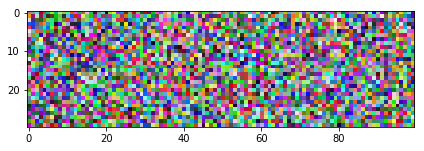

In [4]:
# generate a random image
def random_img(shape=[373,500,3]):
    # TODO use the same datatype as training-data
    return np.random.random(shape)
io.imshow(random_img([30,100,3]))

len(img_list) 10222
(375, 500, 3) 562500 uint8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


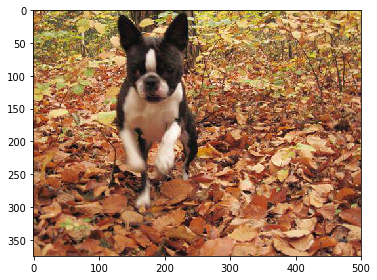

In [5]:
# Import train data
img_dir = config.dataset_dir + 'train/'
img_list = os.listdir(img_dir)
print('len(img_list)',len(img_list))
img_name = img_list[0]

def read_img(img_name):
    return io.imread(img_dir + '/' + img_name)

img = read_img(img_name)
# all imgs should be equally sized # TODO function to crop photos?
dimensions = img.shape
print(img.shape, img.size, img.dtype)
io.imshow(img)

In [6]:
# Collect test data (+labels)
train = []
labels = []
for img_name in img_list[1:100]:
    img = read_img(img_name)
    # fix until images can be cropped
    if img.shape == dimensions:
        # print('+1', img.shape, img.dtype)
        # img = random_img([dimensions[0],dimensions[1]])
        train.append(img.flatten())
        label = 1 # if np.random.random() < 0.5 else 0
        labels.append(label)
        # add noise for every dog
        #   generate a random array of same dims + type as original
        img = np.empty_like(img) # .fill(1) # (optional) fill the array with an arbitrary number
        train.append(img.flatten())
        labels.append(0)
print(len(train),len(labels))
train[0]

62 62


array([ 51,  34,  27, ..., 192, 163, 157], dtype=uint8)

In [7]:
# SVM
clf = svm.SVC()
clf.fit(train,labels)
print('done')

done


In [8]:
test = []
test_noise = []
for i in range(10,90):
    img = read_img(img_list[i])
    if img.shape == dimensions:
        test.append(img.flatten())
        test_noise.append(np.empty_like(img).flatten())
        # test_noise.append(np.empty_like(img).flatten().fill(1))

def predict_and_test(data,expected_result,clf):
    result = clf.predict(data)
    print(expected_result == result, result)

In [9]:
# test 'real' data; labels = [1]
predict_and_test(test,[1] * len(test),clf)
# (Output should be [True] )

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
# test noisy data; labels = [0]
predict_and_test(test_noise,[0] * len(test_noise),clf)
# (Output should all be [True] )

[False False False False False False False False  True False False False
 False False False False False False False False  True False False] [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [11]:
train[0]

array([ 51,  34,  27, ..., 192, 163, 157], dtype=uint8)

In [12]:
test[0]

array([ 5,  1,  0, ..., 53, 58, 52], dtype=uint8)

In [13]:




# (optional)
# reduce number of features
# use only te mean of the images (= average pixel value for each r,g,b)

train3 = list(map(lambda x: [1,x.mean()], train))

# SVM
clf2 = svm.SVC()
clf2.fit(train3,labels)
print('done')

done


In [14]:
test3 = list(map(lambda x: [1,x.mean()], test))
test_noise3 = list(map(lambda x: [1,x.mean()], test_noise))

predict_and_test(test3,[1] * len(test3),clf2)
predict_and_test(test3,[0] * len(test_noise3),clf2)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
[False False False False False False False False False False False False
 False False False False  True False False False False False  True] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
